# **Business Case: Netflix - Data Exploration and Visualisation**

**About NETFLIX**

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Business Problem**

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

---

## Importing required libraries

In [ ]:
#installing ydata-profiling package for profile report
!pip install ydata-profiling

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

## Downloading the Netflix Dataset

In [4]:
netflix_df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

In [ ]:
#creating deep copy of the dataset for easy access
df = netflix_df.copy()

## Basic Metrics of Netflix dataset

In [ ]:
#columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#indices
df.index

RangeIndex(start=0, stop=8807, step=1)

In [ ]:
#rows
df.values

array([['s1', 'Movie', 'Dick Johnson Is Dead', ..., '90 min',
        'Documentaries',
        'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'],
       ['s2', 'TV Show', 'Blood & Water', ..., '2 Seasons',
        'International TV Shows, TV Dramas, TV Mysteries',
        'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'],
       ['s3', 'TV Show', 'Ganglands', ..., '1 Season',
        'Crime TV Shows, International TV Shows, TV Action & Adventure',
        'To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.'],
       ...,
       ['s8805', 'Movie', 'Zombieland', ..., '88 min',
        'Comedies, Horror Movies',
        'Looking to survive in a world taken over by zombies, a dorky college st

In [ ]:
#first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#last 5 rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#statistical analysis
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
#statistical analysis for all columns
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [ ]:
#shape
df.shape

(8807, 12)

In [ ]:
#unique counts in each column
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
#types in dataset
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

We can see that number of unique values for 'title' column equals row count (in df.shape). This indicates that the dataset contains the information of 8807 unique Movies or TV Shows streaming on Netflix

In [ ]:
#size
df.size

105684

In [ ]:
#duplicates
df.duplicated().sum()

0

This shows that there are no duplicates in the dataset

In [ ]:
#check nulls
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

From this, we can say that there are some null values across director, cast, country, date_added, rating and duration columns

We can handle these null values by data imputation

## Profile Report of Netflix Dataset

In [ ]:
ProfileReport(df)

Output hidden; open in https://colab.research.google.com to view.

This is the profile report of given dataset.
Here we can get the entire report of the dataset i.e., statistics, correlations, Missing values count etc.

## Inspecting Missing Values

In [ ]:
#check nulls
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#checking null percentage
round(df.isna().sum()/df.shape[0]*100,2)

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

Here, we can see that null value percentage of any column does not exceed 50%. We can drop columns only if it has either large or negligible null value percentage. But we can fill those missing nulls with appropriate data.

Let's focus on 3 nulls in duration

In [ ]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

If you observe, there are 3 null values in duration at indices 5541, 5794, 5813 and these duration values are mistakenly added to rating. So replacing null values with rating values

In [ ]:
df['duration']=df['duration'].fillna(df['rating'])

In [ ]:
df.loc[[5541,5794,5813]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


Duration values are successfully filled. Now we have to replace rating values with best suitable rating since these are unappropriate rating values

If you observe the director for these values is same (Louis C.K.).
We can check with that director's movies or shows so that we can take rating that is given to most of his works

In [ ]:
df[df['director'] == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


we got the same data i.e., this director only did these 3 movies. Now we have to check for another similarity..
We can see that the titles contains 'Hilarious', 'comedy' i.e., it is a comedy centric film and country is 'United States'.
So we can check for the rating that is given to most of the comedy movies in United States

In [ ]:
df[(df['listed_in'].apply(lambda x : 'Comedy' in str(x))) & (df['country'] == 'United States') & (df['type'] == 'Movie')]['rating'].value_counts()

rating
TV-MA    174
TV-14     21
R          7
TV-PG      6
NR         4
TV-G       2
PG-13      1
Name: count, dtype: int64

See, we got rating 'TV-MA' for most of the comedy movies in United States. So we can use this rating

In [ ]:
df['rating'][[5541,5794,5813]] = 'TV-MA'

In [ ]:
df.loc[[5541,5794,5813]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,TV-MA,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,TV-MA,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,TV-MA,66 min,Movies,The comic puts his trademark hilarious/thought...


We have successfully replaced rating and duration with appropriate values

In [ ]:
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


Here we can't do much validation as we don't find much similarities

## Movies vs TV Shows

In [ ]:
#count of content types on netflix
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

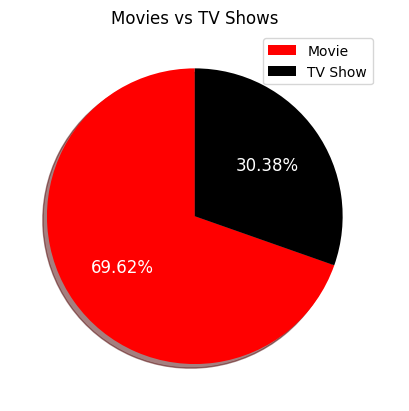

In [ ]:
#pie chart for content percentage
plt.pie( df['type'].value_counts().values,
         labels = df['type'].value_counts().index,
         colors = ('red','black'),
         autopct = '%.2f%%',
         textprops = {'color':"w", 'fontsize':12},
         shadow = True,
         startangle = 90)
plt.title('Movies vs TV Shows')
plt.legend()
plt.show()

From this pie chart, we can say that most of the content streaming on netflix are movies i.e., over 69% of the content streaming on netflix are movies and rest of the content are TV Shows

### Rating wise Count

In [ ]:
#rating count
df['rating'].value_counts()

rating
TV-MA       3210
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

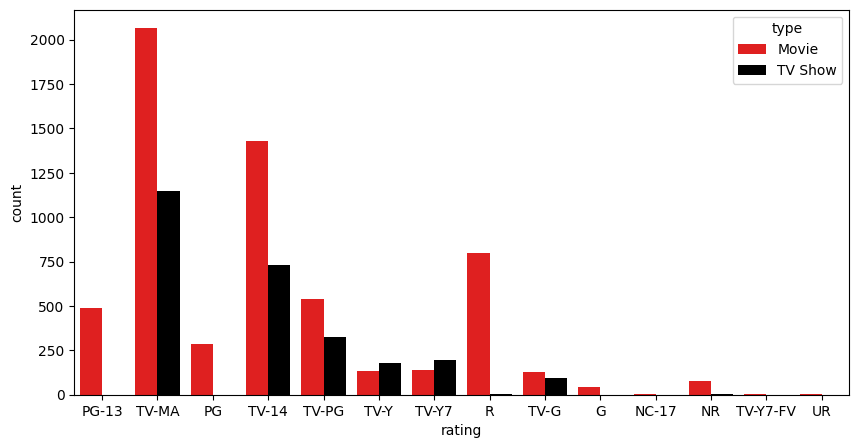

In [ ]:
#countplot for rating
plt.figure(figsize=(10,5))
sns.countplot(df, x = 'rating', hue='type', palette = {'Movie':'red','TV Show':'black'})
plt.show()

From this graph, we can observe that most of the content were given rating 'TV-14'

*   Top 3 ratings given for Movies are TV-MA, TV-14 and R.
*   Top 3 ratings given for TV Shows are TV-MA, TV-14 and TV-PG.
*   TV-14 rating means unsuitable for under 14 years old
*   TV-MA rating means unsuitable for under 17 years old
*   So most of the content on Netflix can be watched by people above 17 years old.










### Year wise count

In [ ]:
#count of content released on specific year
df['release_year'].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

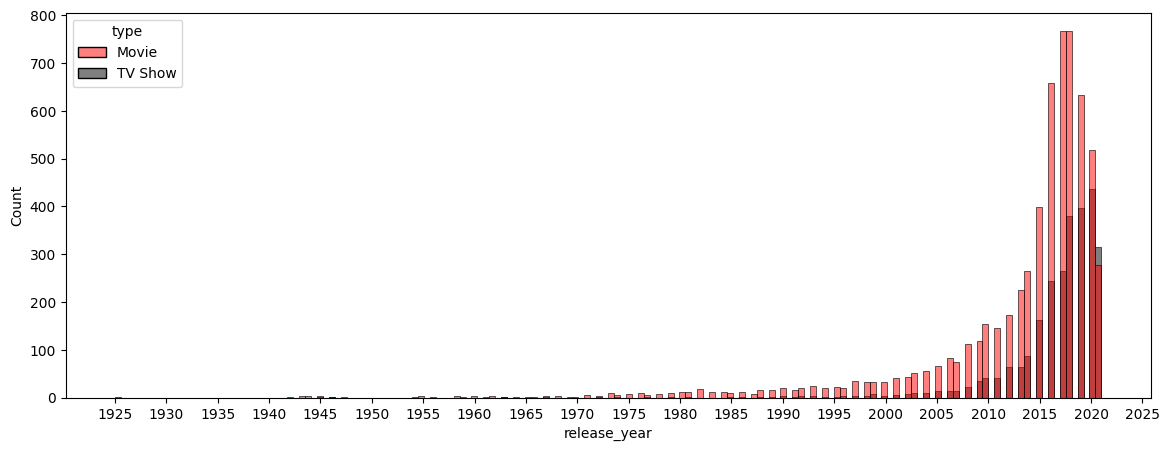

In [ ]:
#histogram for year wise content
plt.figure(figsize=(14,5))
sns.histplot(df, x = 'release_year', hue='type', palette = {'Movie':'red','TV Show':'black'})
y = df['release_year'].sort_values().unique()
plt.xticks(np.arange(y[0], y[-1]+5, 5))
plt.show()

This histogram plot represents content released per year.

Netflix uploaded most of the content that were released in the years ranges from 2015 to 2020.

This can be understood better after observing density plot.




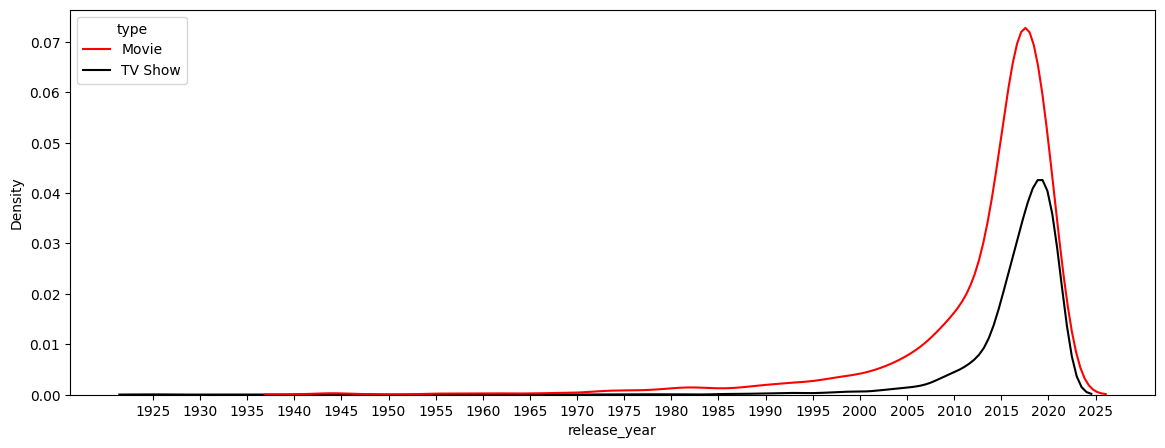

In [ ]:
#kde plot for year wise content
plt.figure(figsize=(14,5))
sns.kdeplot(df, x = 'release_year', hue='type', palette = {'Movie':'red','TV Show':'black'})
y = df['release_year'].sort_values().unique()
plt.xticks(np.arange(y[0], y[-1]+5, 5))
plt.show()



*   The number of movies released per year appears to be increasing slowly after 1970s while the number of TV shows released per year starts increasing after 1990s.
*   Also number of movies released per year peaked after 2010 and observed peak at 2018 while the number of TV shows released per year peaked after 2012 and observed peak at 2019
*   It is possible that the increase in television production is due to the rise of cable and satellite television, which provided more channels for new shows.
*   The data suggests that the movie industry is older than the television industry.










## Handling missing values in nested columns

In [ ]:
#checking null percentage
round(df.isna().sum()/df.shape[0]*100,2)

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

Here, we can see that null value percentage of any column does not exceed 50%. We can drop columns only if it has either large or negligible null value percentage. But we can fill those missing nulls with appropriate data.

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In this data, we can observe that some columns have nested values. For further analysis, we have to unnest the nested values. Before that, we need to check which columns are nested

### Finding Nested Columns

In [ ]:
#function to check nested values
def isNested(x):
  for i in x.values:
    if ", " in str(i):
      return True
  return False

In [ ]:
isNested(df['show_id'])

False

* In the dataset, columns show_id , title are unique and type represents title is either movie or a TV show. So these columns cannot be nested.
* Also columns release_year, rating and duration also cannot be nested.
* Columns date_added, description has ', ' in it which doesn't mean that they are nested






In [ ]:
isNested(df['director'])

True

In [ ]:
isNested(df['cast'])

True

In [ ]:
isNested(df['country'])

True

In [ ]:
isNested(df['listed_in'])

True

We can see that columns director, cast, country and genre are nested. So we have to un-nest these values to decrease null values by merging to form a new dataset


### Un-nesting Nested Columns

In [ ]:
#function to un-nest nested values
def unNesting(x):
  col = x.columns[1]
  unnestedCol = 'unnested_' + col
  x[unnestedCol] = x[col].apply(lambda y: str(y).split(", "))
  return x.explode(unnestedCol)

In [ ]:
director_df = df[['title','director']]
director_df['director'] = director_df['director'].fillna('Unknown_Director')
director_df = unNesting(director_df)
director_df.head()

,title,director,unnested_director
0,Dick Johnson Is Dead,Kirsten Johnson,Kirsten Johnson
1,Blood & Water,Unknown_Director,Unknown_Director
2,Ganglands,Julien Leclercq,Julien Leclercq
3,Jailbirds New Orleans,Unknown_Director,Unknown_Director
4,Kota Factory,Unknown_Director,Unknown_Director


In [ ]:
cast_df = df[['title', 'cast']]
cast_df['cast'] = cast_df['cast'].fillna('Unknown_Cast')
cast_df = unNesting(cast_df)
cast_df.head()

,title,cast,unnested_cast
0,Dick Johnson Is Dead,Unknown_Cast,Unknown_Cast
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Khosi Ngema
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Gail Mabalane
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Thabang Molaba


In [ ]:
country_df = df[['title', 'country']]
country_df['country'] = country_df['country'].fillna('Unknown_Country')
country_df = unNesting(country_df)
country_df.head()

,title,country,unnested_country
0,Dick Johnson Is Dead,United States,United States
1,Blood & Water,South Africa,South Africa
2,Ganglands,Unknown_Country,Unknown_Country
3,Jailbirds New Orleans,Unknown_Country,Unknown_Country
4,Kota Factory,India,India


In [ ]:
genre_df = df[['title', 'listed_in']]
genre_df['listed_in'] = genre_df['listed_in'].fillna('Unknown_Genre')
genre_df = unNesting(genre_df)
genre_df.rename({'listed_in':'genre', 'unnested_listed_in' : 'unnested_genre'}, axis=1, inplace=True )
genre_df.head()

,title,genre,unnested_genre
0,Dick Johnson Is Dead,Documentaries,Documentaries
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",TV Dramas
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",TV Mysteries
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows


We have to merge these dataframes further to make analysis on them.

### Merging Unnested DataFrames

In [ ]:
#merging director_df
new_df = pd.merge(left=df, right=director_df, on="title", how="inner")

In [ ]:
#merging cast_df
new_df = pd.merge(left=new_df, right=cast_df, on='title', how='inner')

In [ ]:
#merging country_df
new_df = pd.merge(left=new_df, right=country_df, on='title', how='inner')

In [ ]:
#merging genre_df
new_df = pd.merge(left=new_df, right=genre_df, on='title', how='inner')

In [ ]:
new_df.head(1)

,show_id,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,listed_in,description,director_y,unnested_director,cast_y,unnested_cast,country_y,unnested_country,genre,unnested_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson,Kirsten Johnson,Unknown_Cast,Unknown_Cast,United States,United States,Documentaries,Documentaries


All the un-nested dataframes got merged. Now, we need to drop the unnecessary columns and rename the columns to appropriate names.

In [ ]:
#dropping unnessesary columns
new_df.drop(columns = ['director_x','cast_x','country_x','listed_in','director_y','cast_y','country_y','genre'], inplace = True)
new_df.head(1)

,show_id,type,title,date_added,release_year,rating,duration,description,unnested_director,unnested_cast,unnested_country,unnested_genre
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,Unknown_Cast,United States,Documentaries


In [ ]:
#renaming columns
new_df.rename(columns ={'unnested_director':'director', 'unnested_cast':'cast', 'unnested_country':'country', 'unnested_genre':'genre'}, inplace=True)
new_df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,director,cast,country,genre
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,Unknown_Cast,United States,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Unknown_Director,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Unknown_Director,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Unknown_Director,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Unknown_Director,Khosi Ngema,South Africa,International TV Shows


Now, we have to heck for null value rows and duplicates and have to drop them.

In [ ]:
#checking nulls
new_df.isna().sum()

show_id           0
type              0
title             0
date_added      158
release_year      0
rating           67
duration          0
description       0
director          0
cast              0
country           0
genre             0
dtype: int64

In [ ]:
#dropping null rows
new_df.drop(index = new_df[new_df['date_added'].isna()].index, inplace=True)
new_df.drop(index = new_df[new_df['rating'].isna()].index, inplace=True)

In [ ]:
new_df.isna().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
director        0
cast            0
country         0
genre           0
dtype: int64

In [ ]:
#checking duplicates
new_df.duplicated().sum()

55

In [ ]:
#remobing duplicates
new_df.drop_duplicates(keep='first',inplace=True)

In [ ]:
new_df.duplicated().sum()

0

Now, This new dataset is ready for the analysis.

## Analyzing the top 5 on Netflix Movies & TV Shows

In [ ]:
#top 5 directors
dir = new_df.drop(index = new_df[new_df['director'] == 'Unknown_Director'].index)
m_dir = dir[dir['type'] == 'Movie']
m_dir = m_dir[m_dir['director'].isin(m_dir['director'].value_counts().head().index)]
tv_dir = dir[dir['type'] == 'TV Show']
tv_dir = tv_dir[tv_dir['director'].isin(tv_dir['director'].value_counts().head().index)]

#top 5 cast
cas = new_df.drop(index = new_df[new_df['cast'] == 'Unknown_Cast'].index)
m_cas = cas[cas['type'] == 'Movie']
m_cas = m_cas[m_cas['cast'].isin(m_cas['cast'].value_counts().head().index)]
tv_cas = cas[cas['type'] == 'TV Show']
tv_cas = tv_cas[tv_cas['cast'].isin(tv_cas['cast'].value_counts().head().index)]

#top 5 country
con = new_df.drop(index = new_df[new_df['country'] == 'Unknown_Country'].index)
m_con = con[con['type'] == 'Movie']
m_con = m_con[m_con['country'].isin(m_con['country'].value_counts().head().index)]
tv_con = con[con['type'] == 'TV Show']
tv_con = tv_con[tv_con['country'].isin(tv_con['country'].value_counts().head().index)]

#top 5 genre
gen = new_df.drop(index = new_df[new_df['genre'] == 'Unknown_Genre'].index)
m_gen = gen[gen['type'] == 'Movie']
m_gen = m_gen[m_gen['genre'].isin(m_gen['genre'].value_counts().head().index)]
tv_gen = gen[gen['type'] == 'TV Show']
tv_gen = tv_gen[tv_gen['genre'].isin(tv_gen['genre'].value_counts().head().index)]

In [ ]:
#top 5 Movie directors
m_dir['director'].value_counts().reset_index()

,director,count
0,Martin Scorsese,419
1,Youssef Chahine,409
2,Cathy Garcia-Molina,356
3,Steven Spielberg,355
4,Lars von Trier,336


In [ ]:
#top 5 TV Show directors
tv_dir['director'].value_counts().reset_index()

,director,count
0,Noam Murro,189
1,Thomas Astruc,160
2,Houda Benyamina,104
3,Laïla Marrakchi,104
4,Alan Poul,104


In [ ]:
#top 5 Movie cast
m_cas['cast'].value_counts().reset_index()

,cast,count
0,Liam Neeson,161
1,Alfred Molina,157
2,John Krasinski,138
3,Salma Hayek,130
4,Frank Langella,128


In [ ]:
#top 5 TV Show cast
tv_cas['cast'].value_counts().reset_index()

,cast,count
0,David Attenborough,82
1,Takahiro Sakurai,56
2,Yuki Kaji,45
3,Junichi Suwabe,39
4,Ai Kayano,39


In [ ]:
#top 5 countries for Movies
m_con['country'].value_counts().reset_index()

,country,count
0,United States,45791
1,India,21411
2,United Kingdom,8560
3,France,6605
4,Canada,5738


In [ ]:
#top 5 countries for TV Shows
tv_con['country'].value_counts().reset_index()

,country,count
0,United States,13449
1,Japan,5074
2,United Kingdom,4358
3,South Korea,3754
4,Canada,2177


In [ ]:
#top 5 genre for Movies
m_gen['genre'].value_counts().reset_index()

,genre,count
0,Dramas,29749
1,International Movies,28192
2,Comedies,20829
3,Action & Adventure,12216
4,Independent Movies,9818


In [ ]:
#top 5 genre for TV Shows
tv_gen['genre'].value_counts().reset_index()

,genre,count
0,International TV Shows,12815
1,TV Dramas,8933
2,TV Comedies,4907
3,Crime TV Shows,4715
4,Kids' TV,4555


Now, lets plot the top 5 director, cast, country and genre analysis for Movies and TV Shows

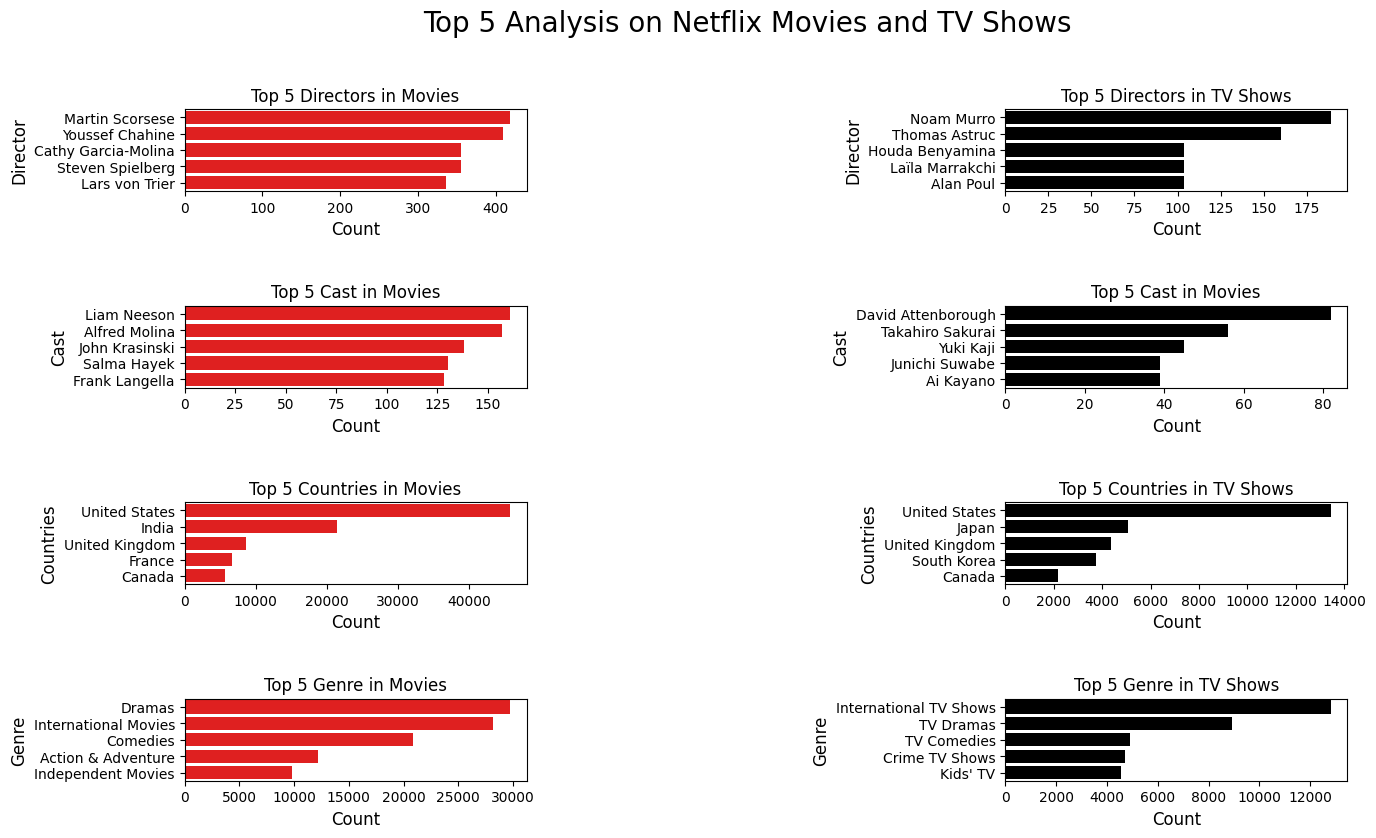

In [ ]:
plt.figure(figsize=(15,10)).suptitle("Top 5 Analysis on Netflix Movies and TV Shows",fontsize=20)

#Top 5 Directors in Movies
plt.subplot(8, 3, 1)
sns.countplot(m_dir, y='director', order = m_dir['director'].value_counts().index, color = 'red')
plt.title('Top 5 Directors in Movies', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Director', fontsize=12)

#Top 5 Directors in TV Shows
plt.subplot(8, 3, 3)
sns.countplot(tv_dir, y='director', order = tv_dir['director'].value_counts().index, color = 'black')
plt.title('Top 5 Directors in TV Shows', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Director', fontsize=12)

#Top 5 Cast in Movies
plt.subplot(8, 3, 7)
sns.countplot(m_cas, y='cast', order = m_cas['cast'].value_counts().index, color = 'red')
plt.title('Top 5 Cast in Movies', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Cast', fontsize=12)

#Top 5 Cast in TV Shows
plt.subplot(8, 3, 9)
sns.countplot(tv_cas, y='cast', order = tv_cas['cast'].value_counts().index, color = 'black')
plt.title('Top 5 Cast in Movies', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Cast', fontsize=12)

#Top 5 Countries in Movies
plt.subplot(8, 3, 13)
sns.countplot(m_con, y='country', order = m_con['country'].value_counts().index, color = 'red')
plt.title('Top 5 Countries in Movies', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Countries', fontsize=12)

#Top 5 Countries in TV Shows
plt.subplot(8, 3, 15)
sns.countplot(tv_con, y='country', order = tv_con['country'].value_counts().index, color = 'black')
plt.title('Top 5 Countries in TV Shows', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Countries', fontsize=12)

#Top 5 Genre in Movies
plt.subplot(8, 3, 19)
sns.countplot(m_gen, y='genre', order = m_gen['genre'].value_counts().index, color = 'red')
plt.title('Top 5 Genre in Movies', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)

#Top 5 Genre in TV Shows
plt.subplot(8, 3, 21)
sns.countplot(tv_gen, y='genre', order = tv_gen['genre'].value_counts().index, color = 'black')
plt.title('Top 5 Genre in TV Shows', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)

plt.show()



*   The chart shows a predominance of North American and European directors. This might be due to a bias in the data source or a reflection of the global reach of these film industries
*   Similar to the movie directors, TV Shows directors category leans towards North American and European directors.
*   4 (Takahiro Sakurai, Yuki Kaji, Junichi Suwabe, and Ai Kayano) out of top 5 cast in TV Shows are Japanese actors might be from Japanese Anime.
*   Top cast in Movies 'Liam Neeson' is an Irish Actor who usually acts in action movies that means he acted in most of the action movies that netflix has.
*   Most of the Movies and TV shows that netflix contains are from USA only. India lies on 2nd place on movies where as Japan lies on 2nd place in TV Shows.
*   Most of the movies in Netflix are Dramas and International Movies where as most of the TV Shows in Netflix are Internation TV Shows and TV Dramas






### Movies and TV Shows across top countries

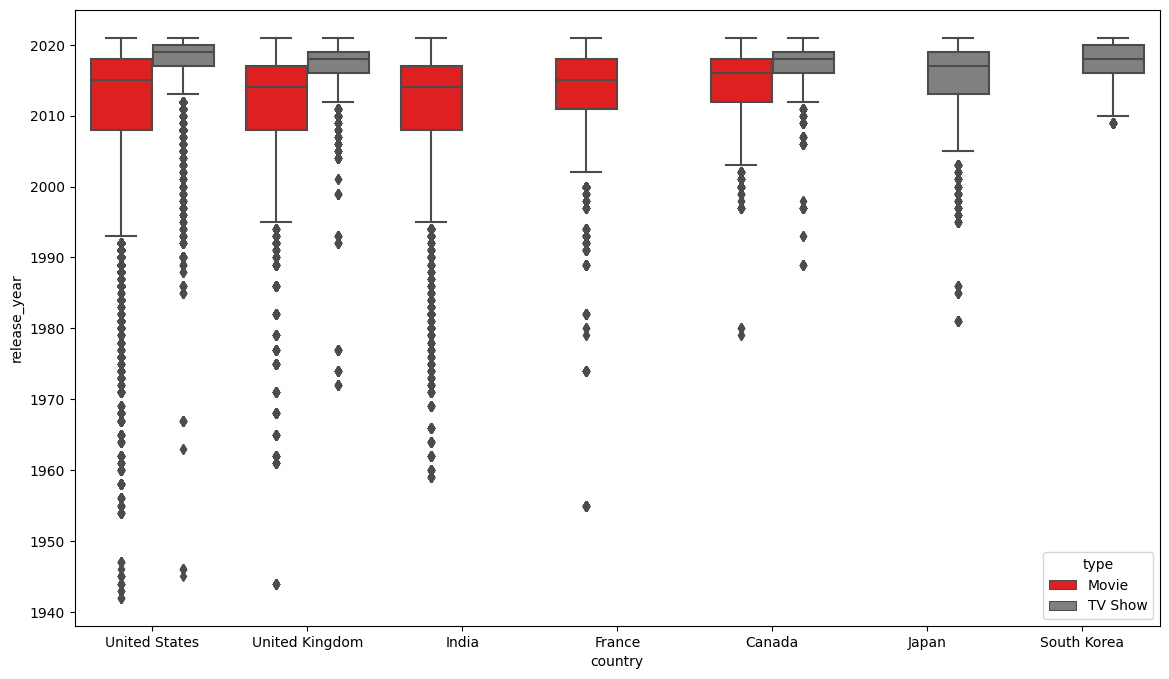

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(pd.concat([m_con,tv_con]), x='country', y='release_year', hue='type', palette = {'Movie':'red','TV Show':'grey'})
plt.show()

This box plot represents Movies and TV Shows across different countries

The median for most of the movies is at 2015 and median for most of the tv shows is 2018




## Country wise Analysis

### Proportion of content available in different countries

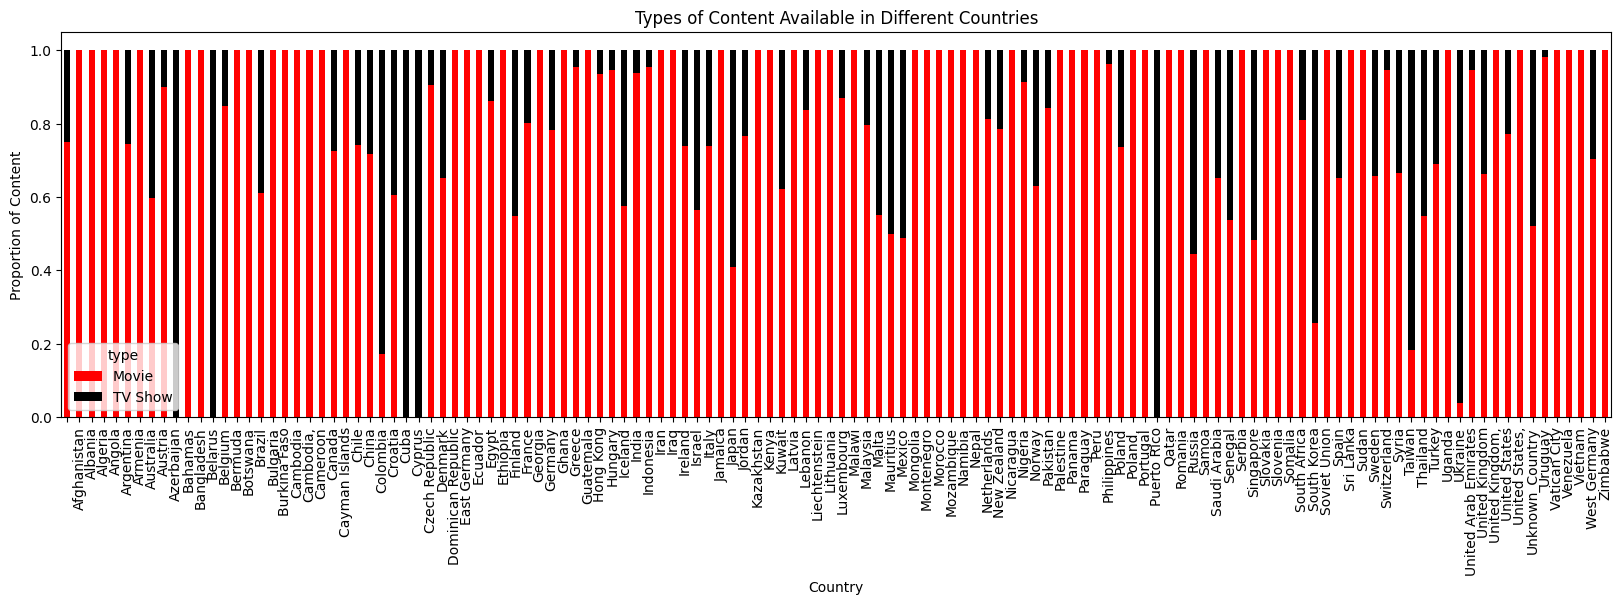

In [ ]:
# Group by country and count the no.of movies and TV shows
country_content = new_df.groupby(['country', 'type']).size().unstack().fillna(0)

# Normalize the data
country_content['Total'] = country_content['Movie'] + country_content['TV Show']
country_content['Movie'] /= country_content['Total']
country_content['TV Show'] /= country_content['Total']

#plot
country_content[['Movie', 'TV Show']].plot(kind = 'bar', stacked = True, figsize = (20,5), color = {'Movie':'red','TV Show':'black'})
plt.title('Types of Content Available in Different Countries')
plt.xlabel('Country')
plt.ylabel('Proportion of Content')
plt.xticks(rotation=90)
plt.show()

This plot gives the proportion of content on Netflix per Country.

Countries like Azerbaijan, Belarus, Cuba, Cyprus and Puerto Rico produces only TV Shows.

Countries like Albania, Algeria, Angola, Argnetina, Brazil etc. produces only Movies.

### Popular Genre accross countries

In [ ]:
country_genre = new_df.groupby(['country', 'genre']).size().unstack(fill_value=0).reset_index()
country_genre.drop(index = country_genre[country_genre['country'] == ''].index, inplace=True)
country_genre

genre,country,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
1,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Algeria,0,0,0,0,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Argentina,41,0,0,0,45,10,10,139,75,...,0,11,19,8,0,0,0,0,11,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Vatican City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,Venezuela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
125,Vietnam,11,0,0,0,0,0,0,10,0,...,0,0,0,0,0,0,0,0,0,6
126,West Germany,0,0,0,0,10,0,10,10,0,...,0,6,15,0,0,0,0,0,0,10


This data shows the genre of the content across different countries.

In [ ]:
country_top_genre = new_df.groupby('country')['genre'].agg(pd.Series.mode).to_frame().reset_index()
country_top_genre.drop(index = country_top_genre[country_top_genre['country'] == '' ].index, inplace=True)
country_top_genre

,country,genre
1,Afghanistan,"[Documentaries, International Movies]"
2,Albania,"[Dramas, International Movies]"
3,Algeria,"[Dramas, International Movies]"
4,Angola,"[Action & Adventure, International Movies]"
5,Argentina,International Movies
...,...,...
123,Vatican City,"[Documentaries, Faith & Spirituality, Internat..."
124,Venezuela,International Movies
125,Vietnam,International Movies
126,West Germany,TV Dramas


This data shows the top or most viewing genre of the content across different countries.

## Duration Analysis

### Movies

In [ ]:
#movies dataframe
movies = df[df['type'] == 'Movie']
movies.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [ ]:
#removing min in duration for movies
movies['duration'] = movies['duration'].apply(lambda x : int(x.replace(' min','')))
movies.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


#### Duration of all movies

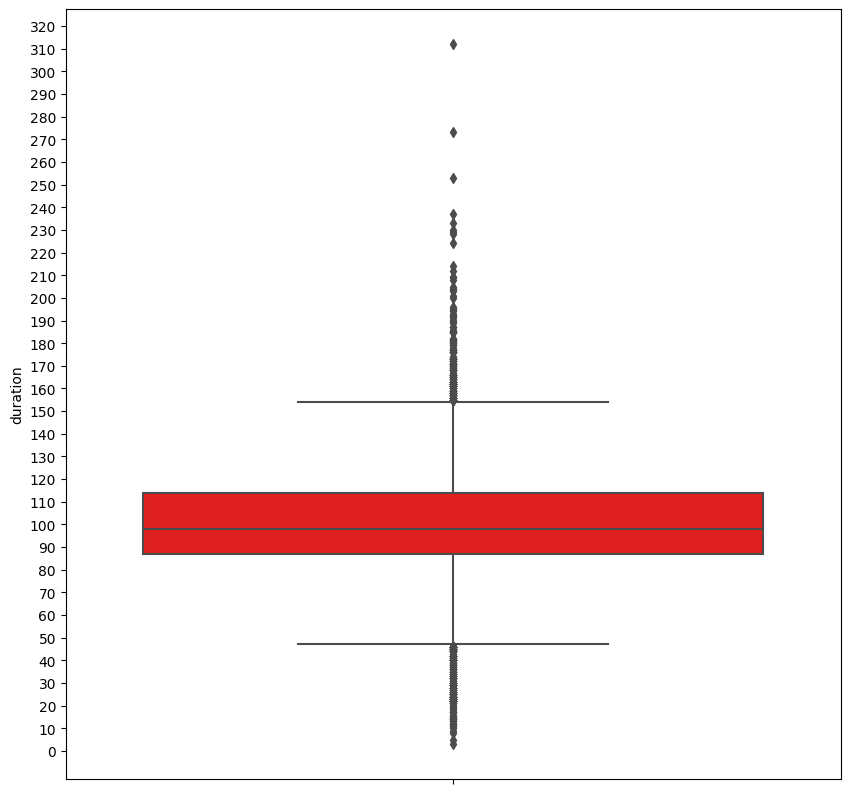

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(movies, y='duration', color='red')
plt.yticks(np.arange(0,np.max(movies['duration'])+10,10))
plt.show()

This box plot shows the duration of all movies.
*   The median line of this box plot is just below 100 i.e., the average duration lies between 95 to 100.
*   25% of the movies have duration less than 90.
*   75% of the movies have duration less than 120.
*   By observing outliers, the duration ranges from 1 to 320.





#### Longest Movie

In [ ]:
longest_movie = movies.loc[movies[movies['duration'] == np.max(movies['duration'])].index]
longest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


By seeing this data, we can say that 'Black Mirror: Bandersnatch' is the longest movie on Netflix

In [ ]:
longest_movies = movies.loc[movies[movies['duration'] >100].index]
longest_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,"September 21, 2021",1996,TV-PG,161,"Comedies, International Movies",Newly divorced and denied visitation rights wi...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8790,s8791,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,"September 1, 2019",2008,UR,113,"Action & Adventure, Comedies",An Israeli counterterrorism soldier with a sec...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120,"Dramas, International Movies",A change in the leadership of a political part...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."


This data shows the movies having duration greater than 100 mins duration.

#### Shortest Movie

In [ ]:
shortest_movie = movies.loc[movies[movies['duration'] == np.min(movies['duration'])].index]
shortest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",NaN,United States,"June 4, 2019",2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ..."


By seeing this data, we can say that 'Limbert Fabian, Brandon Oldenburg' is the shortest movie on Netflix

In [ ]:
shortest_movies = movies.loc[movies[movies['duration'] < 10].index]
shortest_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1484,s1485,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",Timothy Ware-Hill,United States,"December 28, 2020",2020,PG-13,8,Dramas,Animation and activism unite in this multimedi...
1557,s1558,Movie,Canvas,Frank E. Abney III,NaN,United States,"December 11, 2020",2020,G,9,"Children & Family Movies, Dramas","After a heartbreaking loss, a grandfather stru..."
2713,s2714,Movie,Sol Levante,Akira Saitoh,NaN,Japan,"April 2, 2020",2020,TV-14,5,"Action & Adventure, Anime Features, Internatio...",A young warrior and her familiar search for th...
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",NaN,United States,"June 4, 2019",2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ..."


This data shows the movies having duration lesser than 10 mins duration.

### TV Shows

In [ ]:
#TV Shows dataframe
tv_shows = df[df['type'] == 'TV Show']
tv_shows.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
#removing seasons in duration for tv shows
tv_shows['duration'] = tv_shows['duration'].apply(lambda x : int(x.replace(' Seasons','').replace(' Season','')))
tv_shows.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


#### Number of seasons of all TV shows

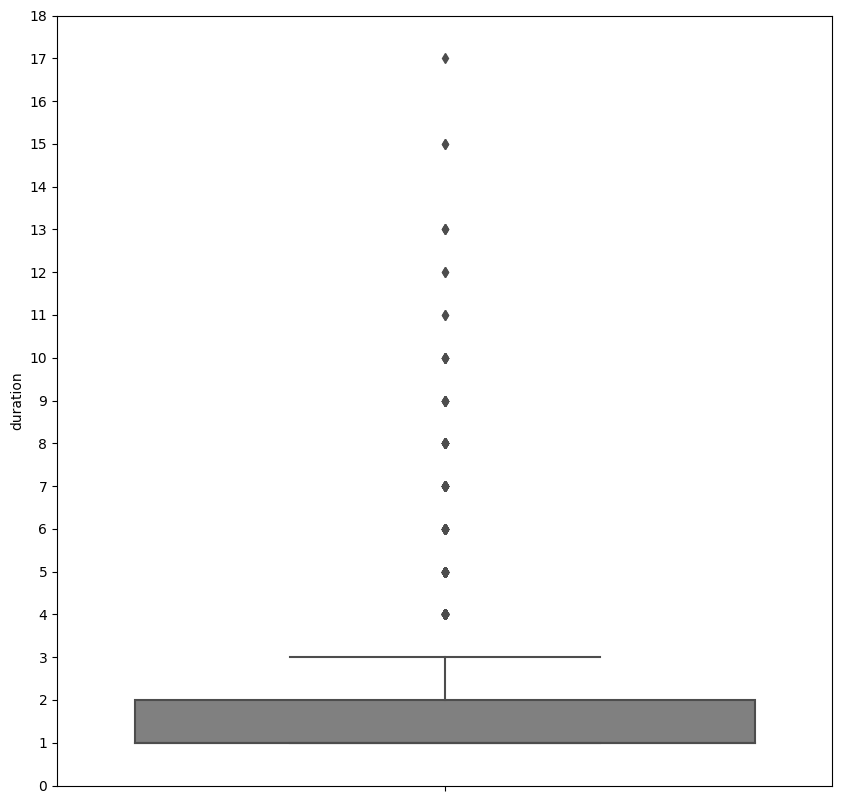

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(tv_shows,  y='duration', color='grey')
plt.yticks(np.arange(0,np.max(tv_shows['duration'])+2,1))
plt.show()

This box plot shows the number of seasons for all TV Shows.
*   The median line and 75% quartile of this box plot is intersected and is at 2 i.e., 75% of TV Shows have 2 seasons and average is also 2 seasons
*   25% of the TV Shows have only 1 season.
*   By observing outliers, the number of seasons for TV Shows ranges from 1 to 17.

#### Shows with highest number of seasons

In [ ]:
longest_show = tv_shows.loc[tv_shows[tv_shows['duration'] == np.max(tv_shows['duration'])].index]
longest_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
548,s549,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"July 3, 2021",2020,TV-14,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...


By seeing this data, we can say that 'Grey's Anatomy' is the TV Show having highest number of seasons i.e., 17

#### Shows with lowest number of seasons

In [ ]:
shortest_show = tv_shows.loc[tv_shows[tv_shows['duration'] == np.min(tv_shows['duration'])].index]
shortest_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,"September 23, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8775,s8776,TV Show,Yeh Meri Family,NaN,"Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...",India,"August 31, 2018",2018,TV-PG,1,"International TV Shows, TV Comedies","In the summer of 1998, middle child Harshu bal..."
8780,s8781,TV Show,Yo-Kai Watch,NaN,"Johnny Yong Bosch, J.W. Terry, Alicyn Packard,...",United States,"April 1, 2016",2015,TV-Y7,1,"Anime Series, Kids' TV",Nate frees a mythical being trapped in a magic...
8783,s8784,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",2016,TV-Y,1,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",2016,TV-Y7,1,Kids' TV,"With the mind of a human being, and the body o..."


This data shows the TV Shows having lowest number of seasons i.e., 1,

## Analysis based on Date Added

### Netflix Movies uploaded on day, month and year analysis

In [ ]:
movies_date_df = movies[['show_id','date_added','duration']]
movies_date_df['date_added'] = pd.to_datetime(movies_date_df['date_added'])
movies_date_df['day_added']=movies_date_df['date_added'].dt.day
movies_date_df['month_added']=movies_date_df['date_added'].dt.month
movies_date_df['year_added']=movies_date_df['date_added'].dt.year
movies_date_df['day_name'] = movies_date_df['date_added'].dt.strftime('%A')
movies_date_df['month_name'] = movies_date_df['date_added'].dt.strftime('%B')
movies_date_df

,show_id,date_added,duration,day_added,month_added,year_added,day_name,month_name
0,s1,2021-09-25,90,25,9,2021,Saturday,September
6,s7,2021-09-24,91,24,9,2021,Friday,September
7,s8,2021-09-24,125,24,9,2021,Friday,September
9,s10,2021-09-24,104,24,9,2021,Friday,September
12,s13,2021-09-23,127,23,9,2021,Thursday,September
...,...,...,...,...,...,...,...,...
8801,s8802,2016-03-09,96,9,3,2016,Wednesday,March
8802,s8803,2019-11-20,158,20,11,2019,Wednesday,November
8804,s8805,2019-11-01,88,1,11,2019,Friday,November
8805,s8806,2020-01-11,88,11,1,2020,Saturday,January


This data gives the duration and date at which movies having different show ids were added to netflix.

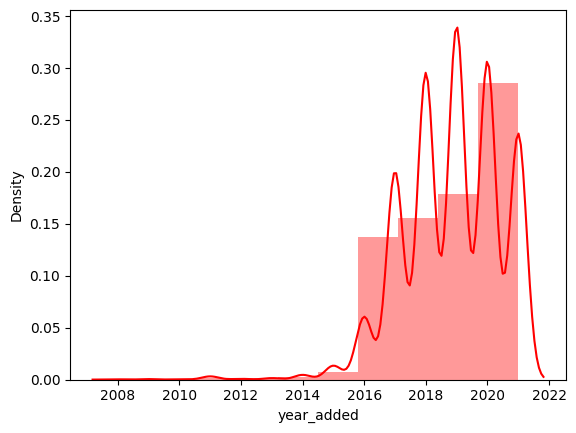

In [ ]:
sns.distplot(movies_date_df['year_added'], kde = True, color ='red', bins = 10)
plt.show()

This Distribution plot represents the year wise count of the movies that were added to netflix.

By seeing this plot, we can say that netflix has added most of its movies in the year 2019.

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
movies_uploaded = movies_date_df.groupby('year_added')['month_name'].value_counts().unstack().fillna(0)[month_order].T
movies_uploaded

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month_name,,,,,,,,,,,,,,
January,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,15.0,58.0,105.0,116.0,152.0,96.0
February,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,9.0,65.0,63.0,103.0,72.0,65.0
March,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,14.0,87.0,138.0,119.0,93.0,75.0
April,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,14.0,66.0,87.0,119.0,127.0,135.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,9.0,63.0,70.0,91.0,105.0,94.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,11.0,65.0,50.0,122.0,115.0,124.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,19.0,45.0,125.0,98.0,103.0,169.0
August,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,23.0,77.0,130.0,87.0,82.0,117.0
September,0.0,0.0,0.0,1.0,0.0,1.0,1.0,6.0,29.0,81.0,81.0,86.0,115.0,118.0


This data gives the count of the movies that were added to netflix on specific year and month

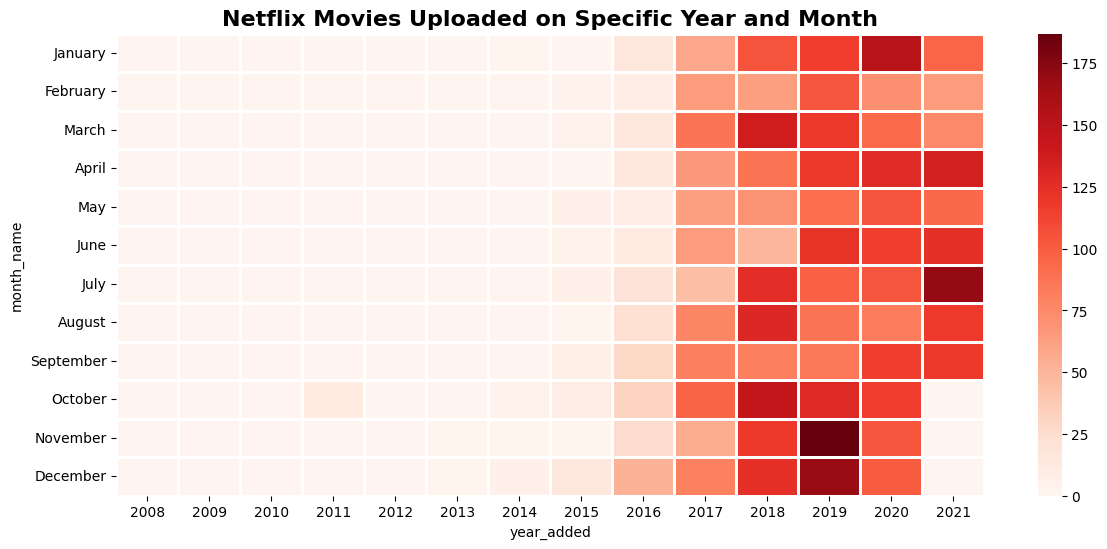

In [ ]:
plt.figure(figsize = (14,6))
sns.heatmap(movies_uploaded, cmap='Reds', edgecolors = 'white', linewidths=2)
plt.title('Netflix Movies Uploaded on Specific Year and Month', fontsize = 16, fontweight = 'bold')

plt.show()

This plot represents the count of the movies that were added to netflix on specific year and month

By seeing this plot, we can say that in November 2019, netflix has added most of its movies followed by July 2021

In [ ]:
movies_date_df.groupby('day_name')['show_id'].nunique().sort_values(ascending=False).reset_index(name='movies_count')

,day_name,movies_count
0,Friday,1566
1,Thursday,1053
2,Wednesday,906
3,Tuesday,852
4,Monday,628
5,Sunday,569
6,Saturday,557


This data represents the day wise count of the movies added to netflix.

By seeing this data, we can say that netflix has uploaded most of its movies on Friday since its a weekend so that people can catch time to watch content.

In [ ]:
movies_date_df.groupby('month_name')['show_id'].nunique().sort_values(ascending=False).reset_index(name='movies_count')

,month_name,movies_count
0,July,565
1,April,550
2,December,547
3,January,546
4,October,545
5,March,529
6,August,519
7,September,519
8,November,498
9,June,492


This data represents the month wise count of the movies added to netflix.

By seeing this data, we can say that netflix has uploaded most of its movies on July month.

In [ ]:
movies_date_df.groupby('year_added')['show_id'].nunique().sort_values(ascending=False).reset_index(name='movies_count')

,year_added,movies_count
0,2019,1424
1,2020,1284
2,2018,1237
3,2021,993
4,2017,839
5,2016,253
6,2015,56
7,2014,19
8,2011,13
9,2013,6


This data represents the year wise count of the movies added to netflix.

By seeing this data, we can say that netflix has uploaded most of its movies on year 2019.

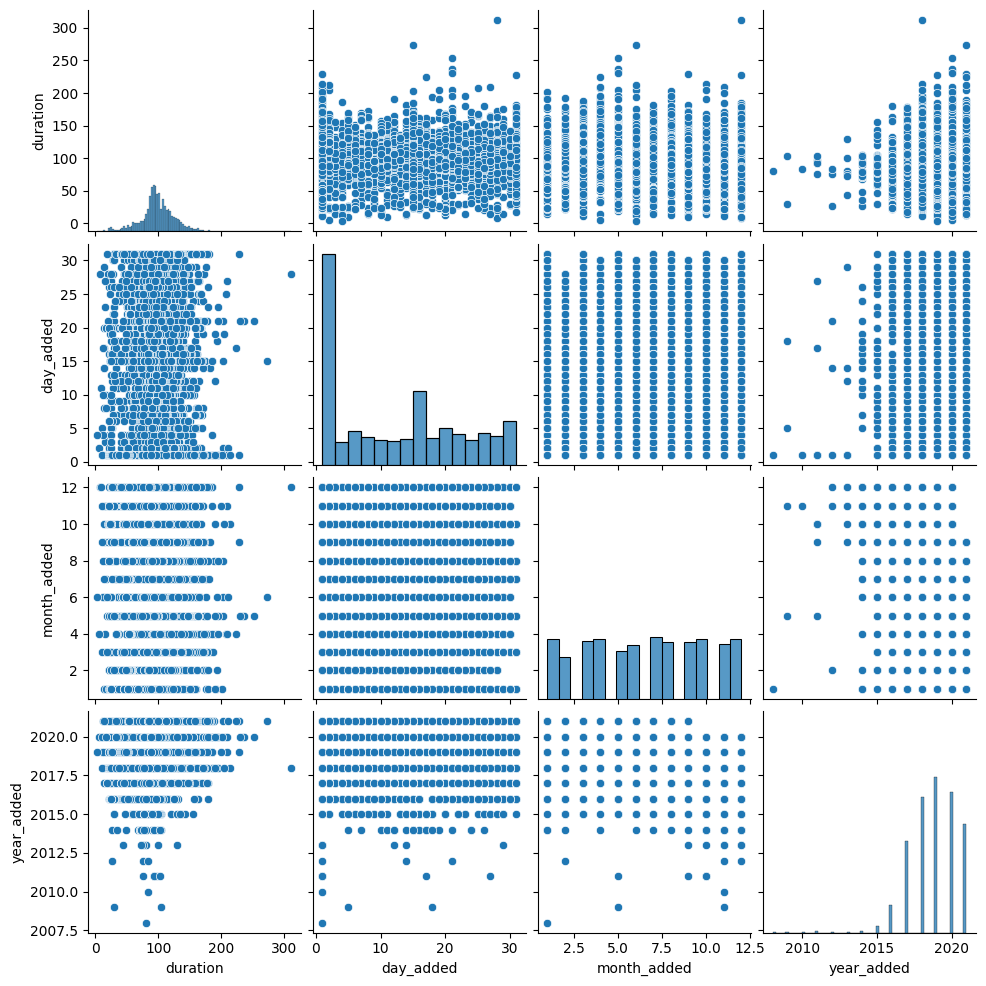

In [ ]:
#Pair Plot
sns.pairplot(movies_date_df)
plt.show()

This is the pair plot that do analysis on all numerical columns in movies dataframe.

In [ ]:
movies_corr = movies_date_df.select_dtypes(include=['number'])
movies_corr.corr()

,duration,day_added,month_added,year_added
duration,1.000000,-0.044245,0.002709,0.125020
day_added,-0.044245,1.000000,0.033242,0.024731
month_added,0.002709,0.033242,1.000000,-0.160306
year_added,0.125020,0.024731,-0.160306,1.000000


This is a correlation table that represents the coefficients among all numerical columns in moves dataframe.

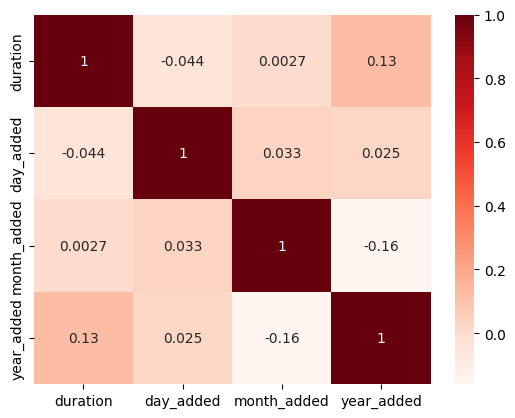

In [ ]:
#Heat Map
sns.heatmap(movies_corr.corr(), cmap= "Reds", annot=True)
plt.show()

This is a heat map of correlation table.

### Netflix TV Shows uploaded on day, month and year analysis

In [ ]:
shows_date_df = tv_shows[['show_id','date_added','duration']]
shows_date_df['date_added']= pd.to_datetime(shows_date_df['date_added'], errors='coerce', infer_datetime_format=True)
shows_date_df.dropna(axis=0,inplace=True)
shows_date_df['day_added']=shows_date_df['date_added'].dt.day
shows_date_df['month_added']=shows_date_df['date_added'].dt.month
shows_date_df['year_added']=round(shows_date_df['date_added'].dt.year)
shows_date_df['day_name'] = shows_date_df['date_added'].dt.strftime('%A')
shows_date_df['month_name'] = shows_date_df['date_added'].dt.strftime('%B')
shows_date_df

,show_id,date_added,duration,day_added,month_added,year_added,day_name,month_name
1,s2,2021-09-24,2,24,9,2021,Friday,September
2,s3,2021-09-24,1,24,9,2021,Friday,September
3,s4,2021-09-24,1,24,9,2021,Friday,September
4,s5,2021-09-24,2,24,9,2021,Friday,September
5,s6,2021-09-24,1,24,9,2021,Friday,September
...,...,...,...,...,...,...,...,...
8795,s8796,2018-05-01,2,1,5,2018,Tuesday,May
8796,s8797,2017-01-17,2,17,1,2017,Tuesday,January
8797,s8798,2018-09-13,3,13,9,2018,Thursday,September
8800,s8801,2016-12-15,1,15,12,2016,Thursday,December


This data gives the duration and date at which TV Shows having different show ids were added to netflix.

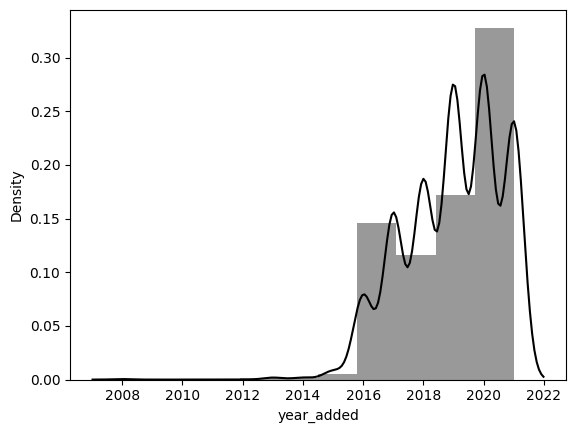

In [ ]:
sns.distplot(shows_date_df['year_added'], kde = True, color ='black', bins = 10)
plt.show()

This Distribution plot represents the year wise count of the TV Shows that were added to netflix.

By seeing this plot, we can say that netflix has added most of its TV Shows in the year 2020.

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
shows_uploaded = shows_date_df.groupby('year_added')['month_name'].value_counts().unstack().fillna(0)[month_order].T
shows_uploaded

year_added,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month_name,,,,,,,,,,
January,0.0,0.0,0.0,0.0,26.0,14.0,18.0,35.0,52.0,36.0
February,1.0,0.0,1.0,0.0,6.0,16.0,23.0,42.0,42.0,44.0
March,0.0,1.0,0.0,1.0,2.0,36.0,32.0,52.0,44.0,37.0
April,0.0,0.0,1.0,4.0,7.0,25.0,27.0,42.0,50.0,53.0
May,0.0,0.0,0.0,0.0,2.0,22.0,25.0,48.0,52.0,38.0
June,0.0,0.0,0.0,1.0,7.0,27.0,27.0,46.0,41.0,83.0
July,0.0,0.0,0.0,2.0,9.0,30.0,25.0,57.0,43.0,88.0
August,0.0,1.0,0.0,0.0,11.0,33.0,33.0,44.0,47.0,61.0
September,0.0,1.0,0.0,0.0,17.0,32.0,42.0,36.0,53.0,65.0


This data gives the count of the TV Shows that were added to netflix on specific year and month

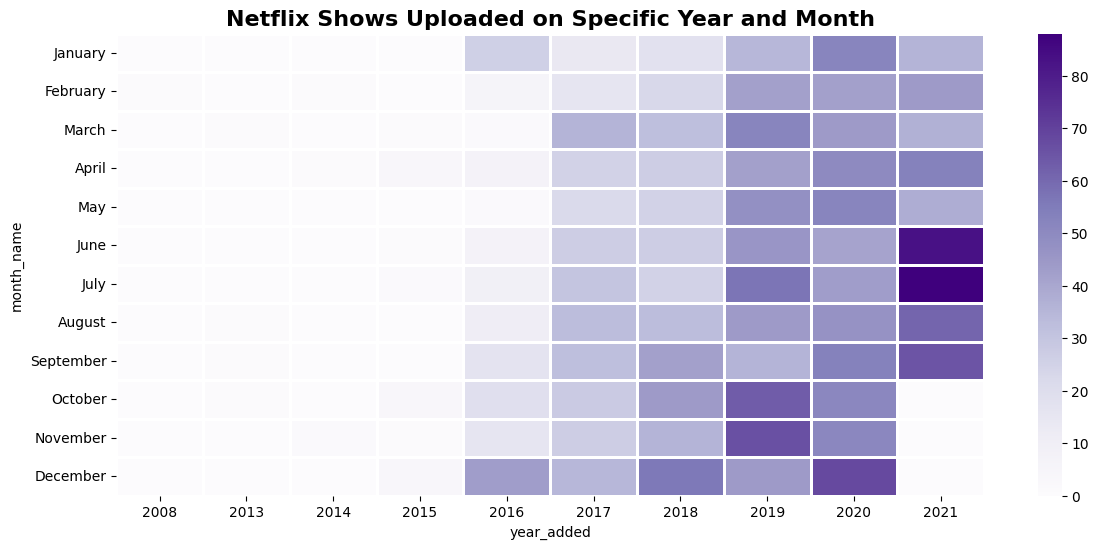

In [ ]:
plt.figure(figsize = (14,6))
sns.heatmap(shows_uploaded, cmap='Purples', edgecolors = 'white', linewidths=2)
plt.title('Netflix Shows Uploaded on Specific Year and Month', fontsize = 16, fontweight = 'bold')

plt.show()

This plot represents the count of the TV Shows that were added to netflix on specific year and month

By seeing this plot, we can say that in July and June of 2019, netflix has added most of its TV Shows.

In [ ]:
shows_date_df.groupby('day_name')['show_id'].nunique().sort_values(ascending=False).reset_index(name='tv_shows_count')

,day_name,tv_shows_count
0,Friday,910
1,Wednesday,370
2,Thursday,334
3,Tuesday,330
4,Saturday,246
5,Monday,217
6,Sunday,171


This data represents the day wise count of the TV Shows added to netflix.

By seeing this data, we can say that netflix has uploaded most of its TV Shows on Friday since its a weekend so that people can catch time to watch content.

In [ ]:
shows_date_df.groupby('month_name')['show_id'].nunique().sort_values(ascending=False).reset_index(name='tv_shows_count')

,month_name,tv_shows_count
0,July,254
1,December,250
2,September,246
3,June,232
4,August,230
5,October,210
6,April,209
7,March,205
8,November,199
9,May,187


This data represents the month wise count of the TV Shows added to netflix.

By seeing this data, we can say that netflix has uploaded most of its TV Shows on July month.

In [ ]:
shows_date_df.groupby('year_added')['show_id'].nunique().sort_values(ascending=False).reset_index(name='tv_shows_count')

,year_added,tv_shows_count
0,2020,594
1,2019,575
2,2021,505
3,2018,388
4,2017,325
5,2016,165
6,2015,17
7,2013,4
8,2014,4
9,2008,1


This data represents the year wise count of the TV Shows added to netflix.

By seeing this data, we can say that netflix has uploaded most of its TV Shows in the year 2020.

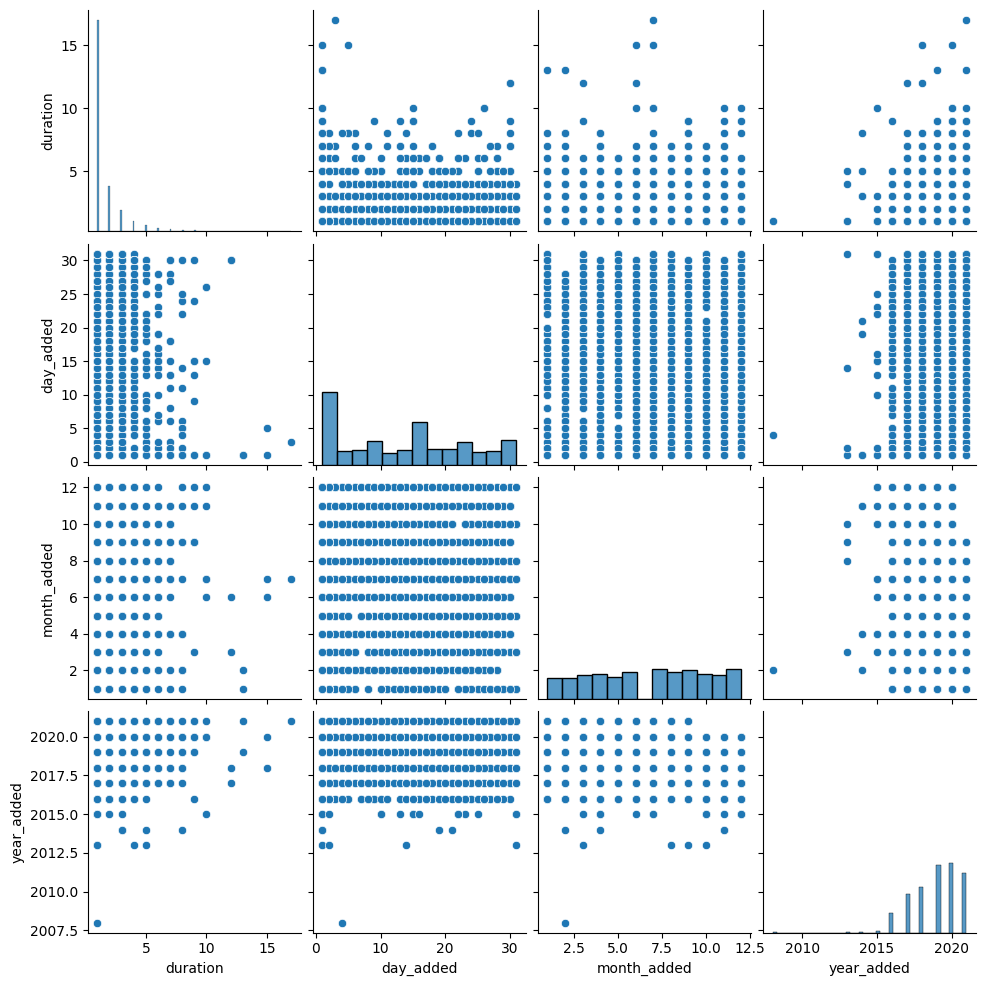

In [ ]:
#Pair Plot
sns.pairplot(shows_date_df)
plt.show()

This is the pair plot that do analysis on all numerical columns in movies dataframe.

In [ ]:
shows_corr = shows_date_df.select_dtypes(include=['number'])
shows_corr.corr()

,duration,day_added,month_added,year_added
duration,1.000000,-0.001793,0.004340,0.106543
day_added,-0.001793,1.000000,-0.011141,0.093224
month_added,0.004340,-0.011141,1.000000,-0.164357
year_added,0.106543,0.093224,-0.164357,1.000000


This is a correlation table that represents the coefficients among all numerical columns in TV Shows dataframe.

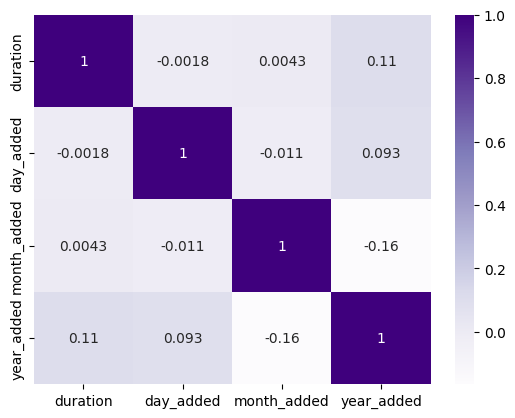

In [ ]:
#Heat Map
sns.heatmap(shows_corr.corr(), cmap= "Purples", annot=True)
plt.show()

This is the heat map of correlation table.

## **Insights**

*   Netflix prioritizes the addition of Movies over TV shows.
*   Netflix targets the audiences aged 17 and above, constitutes a significant portion of the movie ratings added to Netflix.
*   The majority of movies available on Netflix were released between approximately 2008 and 2022 and released most in 2019, while TV shows primarily span from around 2012 to 2022 and released most in 2020.
*   The United States emerges as the leading producer of both movies and TV shows on Netflix.
*   Since most of the content in Netflix is from United States, most of the cast on Netflix content are also from United States.
*   International movies and dramas are prevalent among the content added to Netflix.
*   Similarly, international TV shows and dramas dominate the selection of TV shows added to Netflix.
*   July is the preferred month whereas Fridays are the preferred day for adding content to Netflix.
*   About half of the movies available on Netflix have durations ranging from 90 to 110 minutes.
*   Most of the TV Shows available on Netflix have 2 Seasons.


## **Recommendations**

* **Content Acquisition Strategy:** Netflix should continue prioritizing the addition of movies over TV shows, as it aligns with their audience preferences.

 But also they should keep it in mind that some people likes movies over shows and some like genre based whether it a movie or a show. So, Netflix have to conduct survey regarding this.

* **Target Audience Engagement:** Since audiences aged 17 and above constitute a significant portion of Netflix's viewership and ratings, the platform should continue catering to their preferences while also exploring ways to attract and retain this demographic.

* **Content Release Strategy:** Netflix should focus on top actors and directors whose content are most liked by the audience.

* **International Content Expansion:** Given the popularity of international movies, dramas, and TV shows, Netflix should continue to invest in acquiring and producing content from diverse regions to cater to a global audience and expand its international subscriber base.

* **Diverse Casting Approach:** While the majority of Netflix content is from the United States, Netflix should Look beyond the US to source talented actors, directors, and other creative professionals. This can lead to fresh perspectives and content that appeals to a wider demographic.

* **Strategic Release Timing:** Netflix should schedule content additions primarily on Fridays since its a weekend so that people can catch time to watch content.

* **Content Duration Optimization:** Since about half of the movies on Netflix have durations ranging from 90 to 110 minutes, the platform should continue to acquire content within this duration range while also diversifying to cater to varying viewer preferences.

  This also applies for TV shows.